In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
import pycountry

## Compute average percentage of gdp per country within the same group

### Prepare variables with IMF repartition

In [3]:
advanced_economies = [
    "Andorra", "Australia", "Austria", "Belgium", "Canada", "Croatia", "Cyprus", "Czech Republic",
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hong Kong SAR", "Iceland",
    "Ireland", "Israel", "Italy", "Japan", "Korea. Republic of", "Latvia", "Lithuania", "Luxembourg",
    "Macao SAR", "Malta", "Netherlands", "New Zealand", "Norway", "Portugal", "Puerto Rico", "San Marino",
    "Singapore", "Slovak Republic", "Slovenia", "Spain", "Sweden", "Switzerland", "Taiwan Province of China",
    "United Kingdom", "United States"
]

emerging_developing_europe = [
    "Albania", "Belarus", "Bosnia and Herzegovina", "Bulgaria", "Hungary", "Kosovo", "Moldova",
    "Montenegro", "North Macedonia", "Poland", "Romania", "Russian Federation", "Serbia", "Türkiye. Republic of",
    "Ukraine"
]

emerging_developing_asia = [
    "Bangladesh", "Bhutan", "Brunei Darussalam", "Cambodia", "China. People's Republic of", "Fiji",
    "India", "Indonesia", "Kiribati", "Lao P.D.R.", "Malaysia", "Maldives", "Marshall Islands",
    "Micronesia. Fed. States of", "Mongolia", "Myanmar", "Nauru", "Nepal", "Palau", "Papua New Guinea",
    "Philippines", "Samoa", "Solomon Islands", "Sri Lanka", "Thailand", "Timor-Leste", "Tonga", "Tuvalu",
    "Vanuatu", "Vietnam"
]

latin_america_caribbean = [
    "Antigua and Barbuda", "Argentina", "Bahamas. The", "Barbados", "Belize", "Bolivia", "Brazil", "Chile",
    "Colombia", "Costa Rica", "Curacao", "Dominica", "Dominican Republic", "Ecuador", "El Salvador", "Grenada",
    "Guatemala", "Guyana", "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama", "Paraguay", "Peru",
    "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", "Sint Maarten", "Suriname",
    "Trinidad and Tobago", "Uruguay", "Venezuela"
]

sub_saharan_africa = [
    "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon", "Central African Republic",
    "Chad", "Comoros", "Congo. Dem. Rep. of the", "Congo. Republic of", "Côte d'Ivoire", "Equatorial Guinea",
    "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia. The", "Ghana", "Guinea", "Guinea-Bissau", "Kenya",
    "Lesotho", "Liberia", "Madagascar", "Malawi", "Mali", "Mauritius", "Mozambique", "Namibia", "Niger",
    "Nigeria", "Rwanda", "Senegal", "Seychelles", "Sierra Leone", "South Africa", "South Sudan. Republic of",
    "São Tomé and Príncipe", "Tanzania", "Togo", "Uganda", "Zambia", "Zimbabwe"
]

middle_east_central_asia = [
    "Afghanistan", "Algeria", "Armenia", "Azerbaijan", "Bahrain", "Djibouti", "Egypt", "Georgia", "Iran",
    "Iraq", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyz Republic", "Lebanon", "Libya", "Mauritania", "Morocco",
    "Oman", "Pakistan", "Qatar", "Saudi Arabia", "Somalia", "Sudan", "Syria", "Tajikistan", "Tunisia",
    "Turkmenistan", "United Arab Emirates", "Uzbekistan", "West Bank and Gaza", "Yemen"
]

dict_groups = {"advanced_economies": advanced_economies, 
               "emerging_developing_europe": emerging_developing_europe, 
               "emerging_developing_asia": emerging_developing_asia, 
               "latin_america_caribbean": latin_america_caribbean, 
               "sub_saharan_africa": sub_saharan_africa, 
               "middle_east_central_asia": middle_east_central_asia
              }

In [322]:
dict_groups

{'advanced_economies': ['Andorra',
  'Australia',
  'Austria',
  'Belgium',
  'Canada',
  'Croatia',
  'Cyprus',
  'Czech Republic',
  'Denmark',
  'Estonia',
  'Finland',
  'France',
  'Germany',
  'Greece',
  'Hong Kong SAR',
  'Iceland',
  'Ireland',
  'Israel',
  'Italy',
  'Japan',
  'Korea. Republic of',
  'Latvia',
  'Lithuania',
  'Luxembourg',
  'Macao SAR',
  'Malta',
  'Netherlands',
  'New Zealand',
  'Norway',
  'Portugal',
  'Puerto Rico',
  'San Marino',
  'Singapore',
  'Slovak Republic',
  'Slovenia',
  'Spain',
  'Sweden',
  'Switzerland',
  'Taiwan Province of China',
  'United Kingdom',
  'United States'],
 'emerging_developing_europe': ['Albania',
  'Belarus',
  'Bosnia and Herzegovina',
  'Bulgaria',
  'Hungary',
  'Kosovo',
  'Moldova',
  'Montenegro',
  'North Macedonia',
  'Poland',
  'Romania',
  'Russian Federation',
  'Serbia',
  'Türkiye. Republic of',
  'Ukraine'],
 'emerging_developing_asia': ['Bangladesh',
  'Bhutan',
  'Brunei Darussalam',
  'Cambodia',

### Read csv, preprocess data

In [5]:
df_unprocessed = pd.read_csv('imf_ppp.csv')

In [6]:
# count no data
lines_no_data = df_unprocessed.apply(lambda row: row[row == "no data"].count(), axis=1)
no_data_count = lines_no_data[lines_no_data>0]

In [7]:
# drop columns on projection
df_unprocessed  = df_unprocessed.drop(columns=[str(year) for year in range(2021,2029)])

In [8]:
# replace no data with nan
df_unprocessed = df_unprocessed.replace("no data", np.nan)

In [9]:
# rename column of country name
df_unprocessed.rename(columns={"GDP current prices (Purchasing power parity billions of international dollars)": "country_name"}, inplace=True)

In [10]:
# create group column to make 
for group, country in dict_groups.items(): 
    df_unprocessed.loc[df_unprocessed["country_name"].isin(country), "group"] = group

In [11]:
# manual fill some missing data
df_unprocessed.loc[8, "group"] = "latin_america_caribbean"
df_unprocessed.loc[40, "group"] = "sub_saharan_africa"
df_unprocessed.loc[128, "group"] = "emerging_developing_europe"
df_unprocessed.loc[128, "country_name"] = 'North Macedonia'

In [12]:
df_unprocessed

,country_name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,group
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.945,63.784,69.444,72.056,70.098,74.712,77.418,81.889,81.007,middle_east_central_asia
1,Albania,5.759,6.663,7.28,7.649,8.083,8.214,8.848,8.994,9.181,...,30.53,30.604,32.529,33.595,34.736,37.609,40.061,41.631,40.781,emerging_developing_europe
2,Algeria,89.746,101.183,114.311,125.202,136.986,149.231,151.931,154.599,157.01,...,497.33,497.988,506.135,477.358,471.382,478.068,495.437,509.366,489.697,middle_east_central_asia
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.571,3.563,3.718,3.784,4.072,4.215,4.385,4.553,4.097,advanced_economies
4,Angola,10.89,11.396,12.1,13.102,14.389,15.364,16.128,17.201,18.899,...,186.124,199.866,220.365,204.604,204.875,217.805,220.106,222.48,212.676,sub_saharan_africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Major advanced economies (G7),6801.658,7590.794,8050.707,8640.505,9393.323,10055.559,10569.332,11209.709,12148.111,...,33097.068,34406.938,35543.045,36627.248,37885.563,39497.754,41297.532,42706.284,41283.199,NaN
223,Middle East and Central Asia,1236.761,1392.447,1443.485,1492.155,1540.106,1598.772,1643.402,1676.387,1780.494,...,9216.327,9410.343,9552.696,8971.262,9083.035,9533.692,10024.88,10354.819,10179.79,NaN
224,Other advanced economies,763.451,870.168,942.926,1016.758,1122.112,1207.242,1297.835,1413.814,1541.342,...,6860.449,7196.994,7439.908,7694.029,8007.829,8393.134,8831.313,9165.132,9103.73,NaN
225,Sub-Saharan Africa,342.411,386.748,412.605,427.971,459.122,479.074,502.034,527.738,567.645,...,3057.979,3263.756,3492.069,3573.657,3672.867,3821.841,4038.9,4238.575,4218.793,NaN


In [54]:
df_unprocessed

,country_name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,group
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.945,63.784,69.444,72.056,70.098,74.712,77.418,81.889,81.007,middle_east_central_asia
1,Albania,5.759,6.663,7.28,7.649,8.083,8.214,8.848,8.994,9.181,...,30.53,30.604,32.529,33.595,34.736,37.609,40.061,41.631,40.781,emerging_developing_europe
2,Algeria,89.746,101.183,114.311,125.202,136.986,149.231,151.931,154.599,157.01,...,497.33,497.988,506.135,477.358,471.382,478.068,495.437,509.366,489.697,middle_east_central_asia
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.571,3.563,3.718,3.784,4.072,4.215,4.385,4.553,4.097,advanced_economies
4,Angola,10.89,11.396,12.1,13.102,14.389,15.364,16.128,17.201,18.899,...,186.124,199.866,220.365,204.604,204.875,217.805,220.106,222.48,212.676,sub_saharan_africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Major advanced economies (G7),6801.658,7590.794,8050.707,8640.505,9393.323,10055.559,10569.332,11209.709,12148.111,...,33097.068,34406.938,35543.045,36627.248,37885.563,39497.754,41297.532,42706.284,41283.199,NaN
223,Middle East and Central Asia,1236.761,1392.447,1443.485,1492.155,1540.106,1598.772,1643.402,1676.387,1780.494,...,9216.327,9410.343,9552.696,8971.262,9083.035,9533.692,10024.88,10354.819,10179.79,NaN
224,Other advanced economies,763.451,870.168,942.926,1016.758,1122.112,1207.242,1297.835,1413.814,1541.342,...,6860.449,7196.994,7439.908,7694.029,8007.829,8393.134,8831.313,9165.132,9103.73,NaN
225,Sub-Saharan Africa,342.411,386.748,412.605,427.971,459.122,479.074,502.034,527.738,567.645,...,3057.979,3263.756,3492.069,3573.657,3672.867,3821.841,4038.9,4238.575,4218.793,NaN


In [13]:
num_col = df_unprocessed.columns.drop(['country_name', 'group'])
a = df_unprocessed.copy()
a[num_col] = df_unprocessed[num_col].apply(pd.to_numeric, errors='coerce')

In [14]:
a_aggregated = a.groupby('group').sum()

In [15]:
a_aggregated

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
group,,,,,,,,,,,,,,,,,,,,,
advanced_economies,8440.122,9418.490,10017.566,10735.613,11654.202,12465.408,13127.392,13959.130,15135.316,16347.888,...,43307.600,44622.291,46424.714,47931.750,49506.408,51371.645,53701.550,56244.612,58244.841,56442.658
emerging_developing_asia,1191.296,1380.238,1539.200,1709.821,1898.768,2095.398,2269.109,2493.769,2821.347,3114.544,...,25275.563,27780.183,29604.287,31174.382,32439.479,34251.475,36419.037,39685.366,42510.116,42794.136
emerging_developing_europe,559.275,606.059,651.259,707.503,762.390,805.349,856.901,921.075,968.998,1007.414,...,7096.355,7510.035,8042.431,8274.444,8262.688,8538.126,9192.001,9751.590,10169.382,10129.365
latin_america_caribbean,1632.075,1804.063,1907.343,1916.605,2063.697,2191.674,2318.644,2454.905,2565.470,2684.423,...,8370.738,8674.611,9052.012,9312.781,9253.032,9393.897,9805.893,10136.490,10306.782,9687.020
middle_east_central_asia,1236.761,1392.447,1443.484,1492.154,1540.105,1598.772,1643.399,1676.388,1780.494,1918.564,...,8781.552,9216.323,9410.341,9552.696,8971.263,9083.033,9533.697,10024.880,10354.818,10179.788
sub_saharan_africa,342.409,386.748,412.604,427.973,459.124,479.076,502.033,527.738,567.642,605.605,...,2951.367,3057.979,3263.757,3492.068,3573.657,3672.867,3821.840,4038.899,4238.572,4212.323


In [104]:
merged_df = pd.merge(df_unprocessed, a_aggregated, on=['group'])

In [105]:
for year in list(a_aggregated.columns):
    merged_df[f'{year}_x'] = merged_df[f'{year}_x'].astype(float)
    merged_df[f'{year}_y'] = merged_df[f'{year}_y'].astype(float)
    merged_df[f'percentage_gdp_{year}'] = merged_df[f'{year}_x'].divide(merged_df[f'{year}_y'], fill_value=0) * 100

In [94]:
group_data = merged_df[merged_df['group']=='advanced_economies']

In [99]:
std_by_country = group_data[[f'percentage_gdp_{year}' for year in range(1980, 2020)]].std()


In [108]:
columns_to_calculate_std = [f'percentage_gdp_{year}' for year in range(1980, 2020)]
std_by_country = group_data[columns_to_calculate_std].std(axis=1)

In [112]:
columns_to_calculate_std = [f'percentage_gdp_{year}' for year in range(1980, 2020)]
mean_by_country = group_data[columns_to_calculate_std].mean(axis=1)

In [109]:
std_by_country

46    0.004341
47    0.176941
48    0.043083
49    0.062242
50    0.106282
51    0.096279
52    0.009351
53    0.336930
54    0.052284
55    0.034818
56    0.028975
57    0.423582
58    0.753283
59    0.110705
60    0.122889
61    0.002986
62    0.140212
63    0.101832
64    0.855283
65    1.511394
66    0.968026
67    0.043392
68    0.076435
69    0.019782
70    0.067339
71    0.005146
72    0.046655
73    0.023429
74    0.038662
75    0.041341
76    0.032854
77    0.002383
78    0.245826
79    0.137641
80    0.061534
81    0.117701
82    0.056081
83    0.107674
84    0.484782
85    0.284047
86    1.009249
dtype: float64

In [110]:
df_std = pd.DataFrame(columns=['country_name', 'std'])
df_std['country_name'] = group_data['country_name']
df_std['std'] = std_by_country

In [111]:
df_std

,country_name,std
46,Andorra,0.004341
47,Australia,0.176941
48,Austria,0.043083
49,Belgium,0.062242
50,Canada,0.106282
51,Croatia,0.096279
52,Cyprus,0.009351
53,Czech Republic,0.336930
54,Denmark,0.052284
55,Estonia,0.034818


In [54]:
columns_to_calculate_std = [f'percentage_gdp_{year}' for year in range(2000, 2020)]

def create_chart_for_group(group_of_countries): 
    # get data 
    num_col = df_unprocessed.columns.drop(['country_name', 'group'])
    a = df_unprocessed.copy()
    a[num_col] = df_unprocessed[num_col].apply(pd.to_numeric, errors='coerce')
    a_aggregated = a.groupby('group').sum()
    merged_df = pd.merge(df_unprocessed, a_aggregated, on=['group'])
    for year in list(a_aggregated.columns):
        merged_df[f'{year}_x'] = merged_df[f'{year}_x'].astype(float)
        merged_df[f'{year}_y'] = merged_df[f'{year}_y'].astype(float)
        merged_df[f'percentage_gdp_{year}'] = merged_df[f'{year}_x'].divide(merged_df[f'{year}_y'], fill_value=0) * 100
    group_data = merged_df[merged_df['group']==group_of_countries]
    fig, ax = plt.subplots(figsize=(10, 6))

    for country in group_data['country_name']:
        percentages = [group_data[f'percentage_gdp_{year}'].loc[group_data['country_name'] == country].iloc[0] for year in range(1996, 2021)
                                                               ]
        ax.plot(range(1996,2021), percentages, label=country)

    ax.legend()
    fig.suptitle(f'percentage of GDP within the group for {group_of_countries.title()}', fontsize=20)
    plt.xlabel('years', fontsize=18)
    plt.ylabel('percentage GDP', fontsize=16)
    plt.show()
    
    # compute variation
    std_by_country = group_data[columns_to_calculate_std].std(axis=1)
    mean_by_country = group_data[columns_to_calculate_std].mean(axis=1)
    df_std = pd.DataFrame(columns=['country_name', 'std', 'mean'])
    df_std['country_name'] = group_data['country_name']
    df_std['std'] = std_by_country
    df_std['mean'] = mean_by_country
    print(df_std)


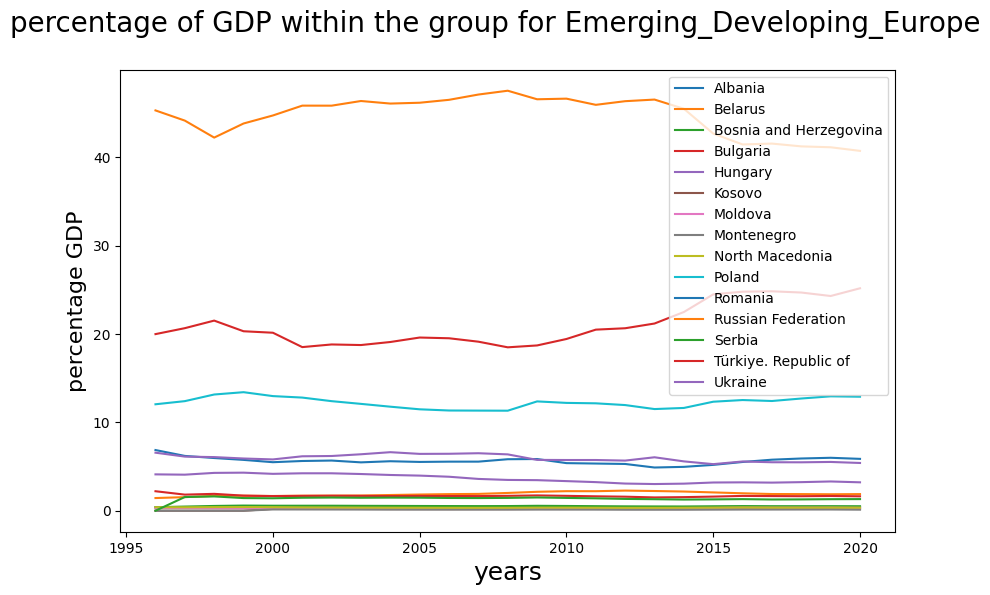

              country_name       std       mean
32                 Albania  0.014440   0.402433
33                 Belarus  0.198321   1.955520
34  Bosnia and Herzegovina  0.026071   0.527214
35                Bulgaria  0.053895   1.648172
36                 Hungary  0.437522   3.553681
37                  Kosovo  0.012198   0.195416
38                 Moldova  0.030815   0.292719
39              Montenegro  0.008180   0.129658
40         North Macedonia  0.018798   0.349154
41                  Poland  0.548110  12.111409
42                 Romania  0.291075   5.520913
43      Russian Federation  2.154971  45.080256
44                  Serbia  0.086065   1.390933
45    Türkiye. Republic of  2.407776  20.903307
46                 Ukraine  0.417455   5.939215


In [55]:
create_chart_for_group("emerging_developing_europe")

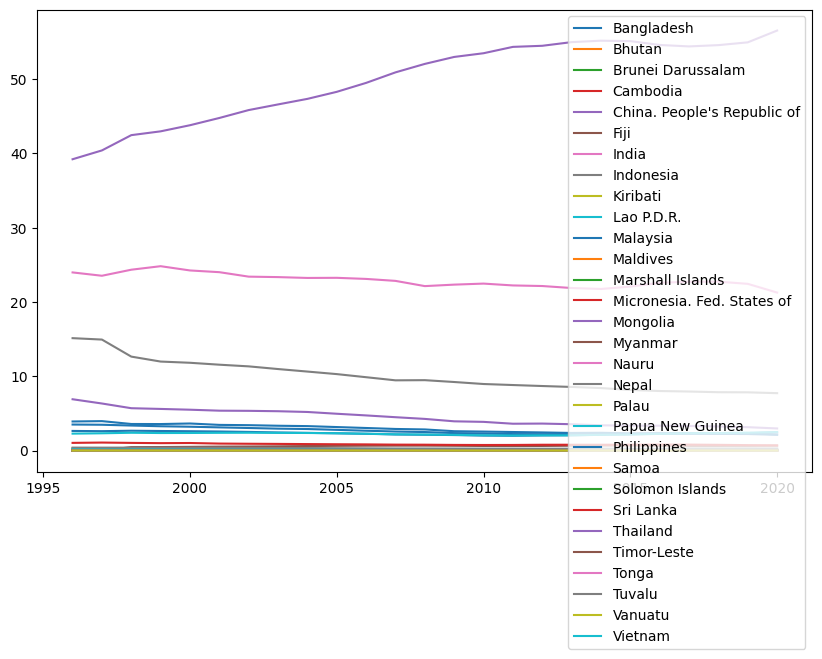

                    country_name       std       mean
166                   Bangladesh  0.180800   2.254587
167                       Bhutan  0.001312   0.019023
168            Brunei Darussalam  0.068139   0.153541
169                     Cambodia  0.008167   0.162546
170  China. People's Republic of  3.934680  51.411752
171                         Fiji  0.011522   0.040256
172                        India  0.682352  22.749025
173                    Indonesia  1.305827   9.394753
174                     Kiribati  0.000291   0.000854
175                   Lao P.D.R.  0.011254   0.118897
176                     Malaysia  0.476313   2.764957
177                     Maldives  0.002146   0.023203
178             Marshall Islands  0.000294   0.000801
179   Micronesia. Fed. States of  0.000662   0.001562
180                     Mongolia  0.005165   0.101046
181                      Myanmar  0.046797   0.616626
182                        Nauru  0.000107   0.000200
183                        N

In [25]:
create_chart_for_group("emerging_developing_asia")

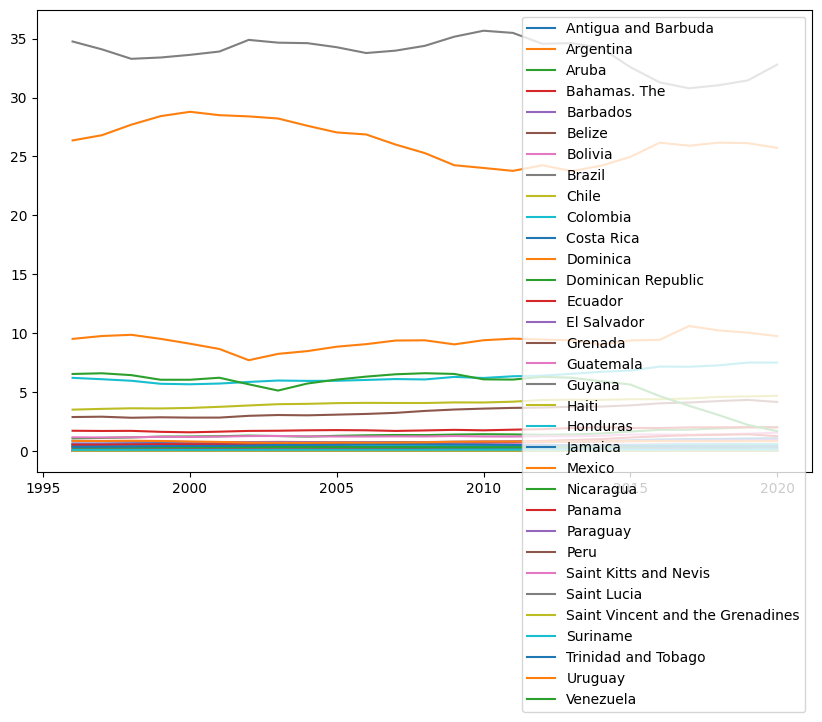

                         country_name       std       mean
133               Antigua and Barbuda  0.004061   0.024032
134                         Argentina  0.662369   9.212261
135                             Aruba  0.007907   0.049242
136                      Bahamas. The  0.018640   0.151211
137                          Barbados  0.010838   0.059022
138                            Belize  0.003873   0.039146
139                           Bolivia  0.135948   0.732293
140                            Brazil  1.502107  33.750373
141                             Chile  0.262735   4.159573
142                          Colombia  0.546801   6.375814
143                        Costa Rica  0.119331   0.796557
144                          Dominica  0.000533   0.008969
145                Dominican Republic  0.239009   1.450021
146                           Ecuador  0.134486   1.810608
147                       El Salvador  0.034588   0.525361
148                           Grenada  0.001577   0.0165

In [26]:
create_chart_for_group("latin_america_caribbean")

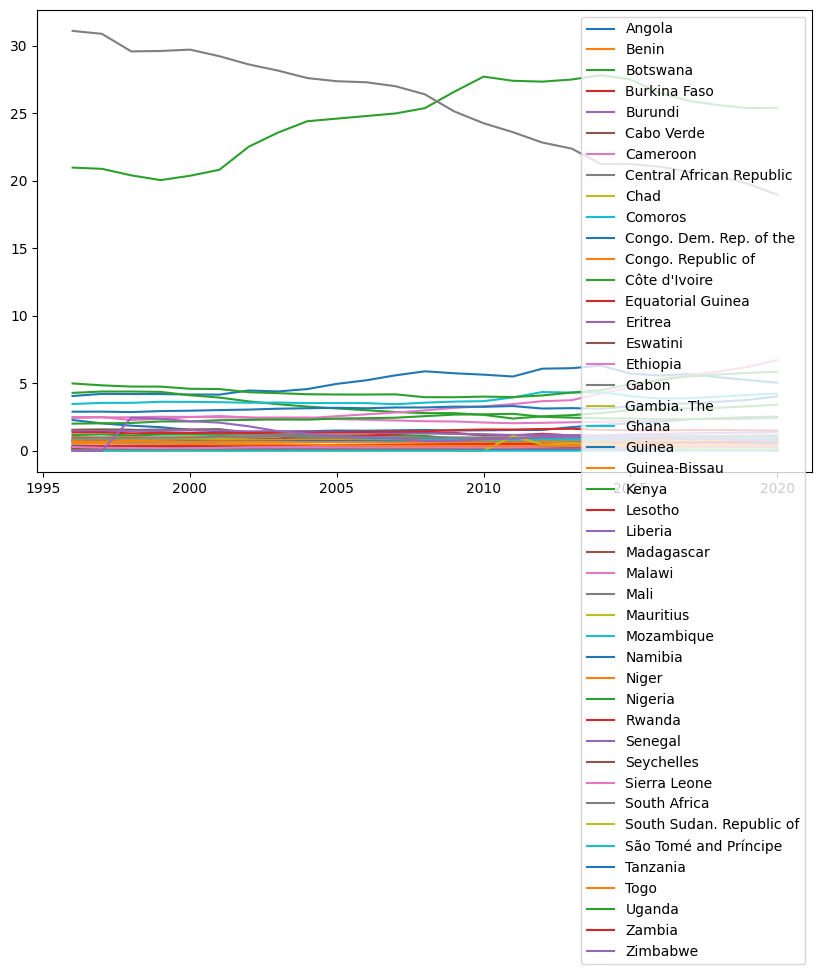

                 country_name       std       mean
88                     Angola  0.657959   5.329654
89                      Benin  0.054735   0.871551
90                   Botswana  0.129569   1.032731
91               Burkina Faso  0.078751   0.892970
92                    Burundi  0.012551   0.222843
93                 Cabo Verde  0.007694   0.108976
94                   Cameroon  0.150571   2.291273
95   Central African Republic  0.037786   0.149074
96                       Chad  0.084813   0.693902
97                    Comoros  0.005551   0.063529
98    Congo. Dem. Rep. of the  0.346596   1.727068
99        Congo. Republic of   0.138302   0.788299
100             Côte d'Ivoire  0.447832   3.096514
101         Equatorial Guinea  0.263645   0.975109
102                   Eritrea  0.031820   0.175882
103                  Eswatini  0.039863   0.306854
104                  Ethiopia  1.260635   3.636976
105                     Gabon  0.176271   0.965179
106               Gambia. The  

In [27]:
create_chart_for_group("sub_saharan_africa")

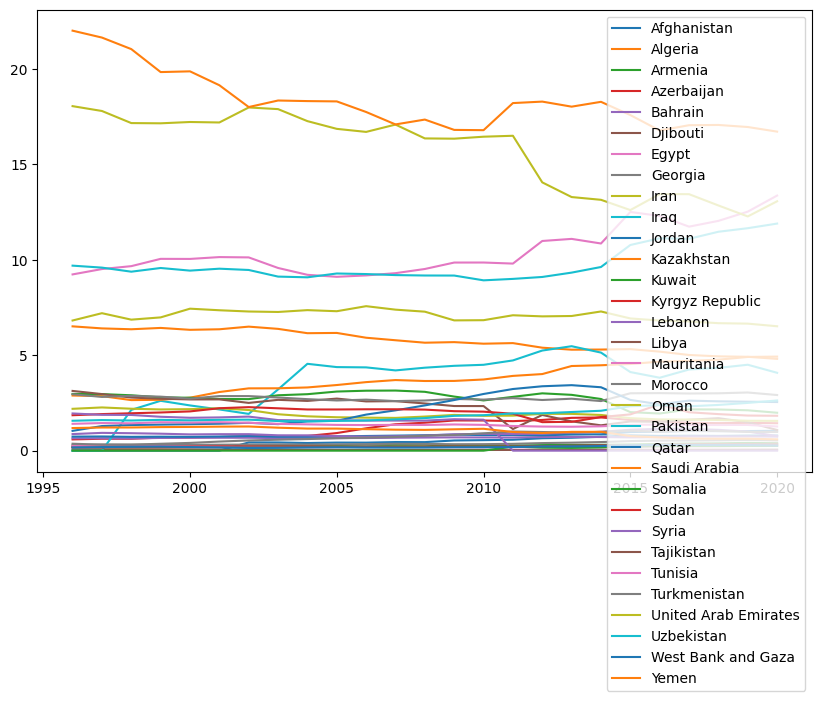

            country_name       std       mean
0            Afghanistan  0.314871   0.266020
1                Algeria  1.321922   6.661921
2                Armenia  0.133439   0.182470
3             Azerbaijan  0.632163   0.794571
4                Bahrain  0.039427   0.679823
5               Djibouti  0.021231   0.032154
6                  Egypt  1.280920   9.900354
7                Georgia  0.188473   0.262879
8                   Iran  2.688732  17.293619
9                   Iraq  2.134861   2.170819
10                Jordan  0.104875   0.816179
11            Kazakhstan  1.806795   2.583844
12                Kuwait  0.616129   2.698467
13       Kyrgyz Republic  0.118321   0.168951
14               Lebanon  0.314612   1.003913
15                 Libya  1.637519   3.341876
16            Mauritania  0.093654   0.156035
17               Morocco  0.227047   2.848683
18                  Oman  0.281845   1.903414
19              Pakistan  1.150522   9.239982
20                 Qatar  0.732863

In [140]:
create_chart_for_group("middle_east_central_asia")

## Linear regression on  gdp  per group to compute gdp share per group

# Use data from IMF 

## Preprocess data 

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [32]:
ppp_df = pd.read_csv('ppp_region.csv', sep=";")

In [33]:
ppp_df.drop(0, inplace=True)
ppp_df.drop(columns=[str(year) for year in range(1980, 1992)], inplace=True)
ppp_df.drop(columns=[str(year) for year in range(2024, 2029)], inplace=True)

In [40]:
columns_to_modify = [str(year) for year in range(1992, 2024)]


In [35]:
ppp_df[columns_to_modify] = ppp_df[columns_to_modify].replace(',', '.', regex=True).astype(float)

In [36]:
ppp_df = ppp_df.rename(columns={'GDP current prices (Purchasing power parity billions of international dollars)': 'group_name'})

### create linear model with ppp per region

In [58]:
years_train = [str(year) for year in range(2000, 2023)]
train_data = ppp_df[years_train].transpose()
train_data.columns = ppp_df['group_name'].values
train_data.dropna(inplace=True)
X_train = train_data.index.astype(int).values.reshape(-1,1)
y_train = train_data.values
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Predict on 2023 to 2100, plot the GDP percentage according to model

In [59]:
x_predict = np.arange(2023, 2100).reshape(-1,1)
y_predict = model.predict(x_predict)

In [60]:
percentage_y = y_predict / y_predict.sum(axis = 1, keepdims=True) * 100

Text(0.5, 0.98, 'Estimated  percentage of GDP per group')

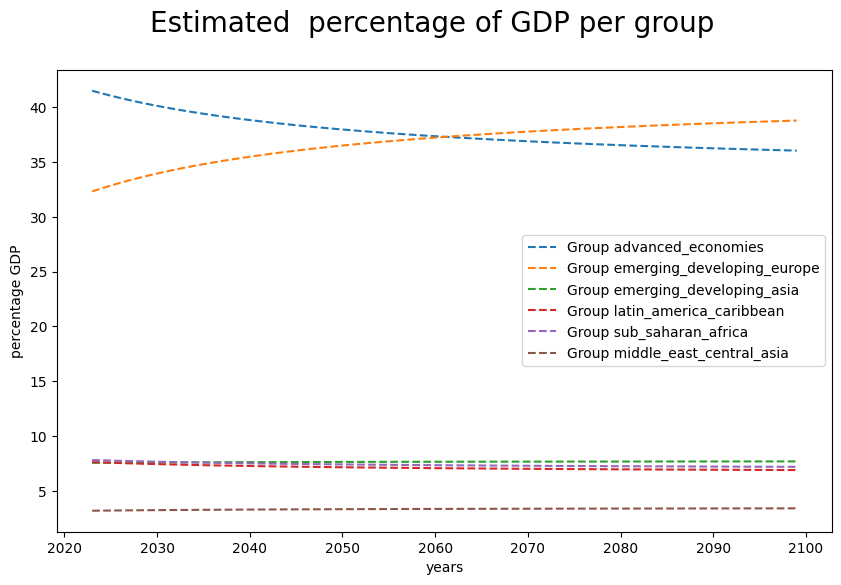

In [97]:
# plot estimated gdp percentage per group
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(y_predict.shape[1]):
    plt.plot(x_predict, percentage_y[:, i],label=f'Group {list(dict_groups.keys())[i]}', linestyle='--')
ax.legend()
plt.xlabel('years')
plt.ylabel('percentage GDP')
fig.suptitle(f'Estimated  percentage of GDP per group', fontsize=20)


In [69]:
# get parameters of model
a = model.coef_
b = model.intercept_

### Compute mean share of each country within it group

In [100]:
columns_to_calculate_std = [f'percentage_gdp_{year}' for year in range(2000, 2020)]


In [101]:
df_country_percentage = pd.DataFrame(columns = ['country_name', 'group', 'mean_percentage'])
df_country_percentage['mean_percentage'] = merged_df[columns_to_calculate_std].mean(axis=1) 
df_country_percentage['country_name'] = merged_df['country_name']
df_country_percentage['group'] = merged_df['group']

In [102]:
df_country_percentage

,country_name,group,mean_percentage
0,Afghanistan,middle_east_central_asia,0.532040
1,Algeria,middle_east_central_asia,5.678268
2,Armenia,middle_east_central_asia,0.290167
3,Azerbaijan,middle_east_central_asia,1.296413
4,Bahrain,middle_east_central_asia,0.694617
...,...,...,...
191,Timor-Leste,emerging_developing_asia,0.010527
192,Tonga,emerging_developing_asia,0.002386
193,Tuvalu,emerging_developing_asia,0.000166
194,Vanuatu,emerging_developing_asia,0.002701


In [103]:
# export dataframe if needed 
